In [1]:
import pandas as pd

data = pd.read_csv('Merged_Dataset.csv')

In [2]:
data.head()

,id,name,disc_number,duration_min,explicit,popularity,track_number,artists,album_type,album_name,...,key_confidence,mode_confidence,n_beats,n_bars,genre,artist_list,no_of_artist,genre_collection,followers_collection,popularity_collection
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,4.841317,False,52,5,Kölsch,album,1989,...,0.500,0.525,705.0,234.0,minimal-techno,['Kölsch'],1,"[""['danish electronic', 'danish techno', 'deep...",[218818],[51]
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,8.987150,False,45,5,Kiasmos,album,Kiasmos,...,0.410,0.589,1074.0,269.0,minimal-techno,['Kiasmos'],1,"[""['electronica', 'icelandic electronic']""]",[231613],[47]
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,4.403333,False,39,5,Joris Delacroix,album,Night Visions,...,0.904,0.760,516.0,171.0,minimal-techno,['Joris Delacroix'],1,"[""['deep euro house', 'minimal melodic techno'...",[100828],[44]
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,6.456883,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.512,0.503,826.0,207.0,minimal-techno,"['Pan-Pot', 'Anfisa Letyago']",2,"[""['german techno', 'minimal techno', 'raw tec...","[209027, 87586]","[36, 40]"
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,4.149267,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.474,0.459,493.0,123.0,minimal-techno,['Kollektiv Turmstrasse'],1,"[""['german techno', 'hamburg electronic', 'min...",[245839],[45]


In [3]:
data.columns

Index(['id', 'name', 'disc_number', 'duration_min', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_min', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre',
       'artist_list', 'no_of_artist', 'genre_collection',
       'followers_collection', 'popularity_collection'],
      dtype='object')

In [4]:
data.shape

(89562, 39)

In [5]:
for col in data.columns:
    print(col, data[col].dtype)

id object
name object
disc_number int64
duration_min float64
explicit bool
popularity int64
track_number int64
artists object
album_type object
album_name object
album_release_date object
album_release_date_precision object
album_total_tracks int64
danceability float64
energy float64
key int64
loudness float64
mode int64
speechiness float64
acousticness float64
instrumentalness float64
liveness float64
valence float64
tempo float64
features_duration_min float64
time_signature int64
start_of_fade_out float64
tempo_confidence float64
time_signature_confidence float64
key_confidence float64
mode_confidence float64
n_beats float64
n_bars float64
genre object
artist_list object
no_of_artist int64
genre_collection object
followers_collection object
popularity_collection object


In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype == 'int64' or data[col].dtype == 'float64']

In [7]:
numerical_columns

['disc_number',
 'duration_min',
 'popularity',
 'track_number',
 'album_total_tracks',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'features_duration_min',
 'time_signature',
 'start_of_fade_out',
 'tempo_confidence',
 'time_signature_confidence',
 'key_confidence',
 'mode_confidence',
 'n_beats',
 'n_bars',
 'no_of_artist']

In [8]:
data[numerical_columns].shape

(89562, 26)

In [9]:
data[numerical_columns].to_numpy().reshape(-1,26)

array([[1.00000000e+00, 4.84131667e+00, 5.20000000e+01, ...,
        7.05000000e+02, 2.34000000e+02, 1.00000000e+00],
       [1.00000000e+00, 8.98715000e+00, 4.50000000e+01, ...,
        1.07400000e+03, 2.69000000e+02, 1.00000000e+00],
       [1.00000000e+00, 4.40333333e+00, 3.90000000e+01, ...,
        5.16000000e+02, 1.71000000e+02, 1.00000000e+00],
       ...,
       [1.00000000e+00, 3.26421667e+00, 8.00000000e+01, ...,
        4.17000000e+02, 1.06000000e+02, 2.00000000e+00],
       [1.00000000e+00, 3.47830000e+00, 6.00000000e+01, ...,
        3.59000000e+02, 8.90000000e+01, 2.00000000e+00],
       [1.00000000e+00, 3.38043333e+00, 5.70000000e+01, ...,
        3.04000000e+02, 7.50000000e+01, 1.00000000e+00]])

### Density-based outlier detection

In [10]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred = lof.fit_predict(data[numerical_columns].to_numpy().reshape(-1,26))

In [11]:
y_pred.shape

(89562,)

In [12]:
y_pred[40:80]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1])

In [13]:
count = 0
for pred in y_pred:
    if pred == -1:
        count += 1

print(count)

8957


In [14]:
y_pred_series = pd.Series(y_pred, name='is_outlier')
data_draft = pd.concat([data, y_pred_series], axis=1, join='inner')

In [15]:
data_draft['is_outlier']

0        1
1        1
2        1
3        1
4        1
        ..
89557    1
89558    1
89559   -1
89560    1
89561    1
Name: is_outlier, Length: 89562, dtype: int64

In [16]:
data_draft_no_outliers_lof = data_draft[data_draft.is_outlier == 1]
data_draft_outliers_lof = data_draft[data_draft.is_outlier == -1]

In [17]:
data_draft_no_outliers_lof.shape, data_draft_outliers_lof.shape

((80605, 40), (8957, 40))

### isolation forest method

In [18]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1)
outliers_iso_forest = isolation_forest.fit_predict(data[numerical_columns])

In [19]:
outliers_iso_forest

array([ 1, -1,  1, ...,  1,  1,  1])

In [20]:
outliers_iso_forest_series = pd.Series(outliers_iso_forest, name='is_outlier')
data_draft_isolation = pd.concat([data, outliers_iso_forest_series], axis=1, join='inner')

In [21]:
data_draft_isolation_no_outliers = data_draft_isolation[data_draft_isolation.is_outlier == 1]
data_draft_isolation_outliers = data_draft_isolation[data_draft_isolation.is_outlier == 1]

### Interquartile Range outliers

### visualizing LOF

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca_lof = pca.fit_transform(data_draft[numerical_columns])

In [23]:
data_pca_lof_outliers = data_pca_lof[data_draft.loc[data_draft['is_outlier'] == -1].index]
data_pca_lof_no_outliers = data_pca_lof[data_draft.loc[data_draft['is_outlier'] == 1].index]

In [24]:
data_pca_lof_outliers.reshape(3,-1)[0]

array([-7.99001753e+01,  3.09208506e-01, -1.33147636e+01, ...,
        1.37911179e+01, -3.94961241e+02,  6.13249331e+01])

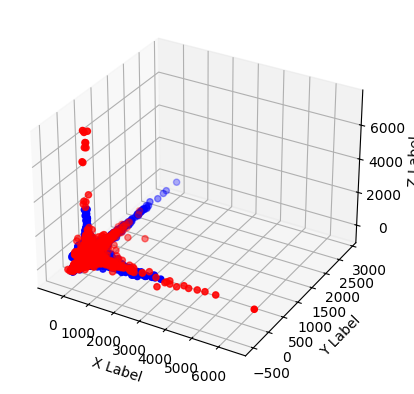

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_lof_outliers.reshape(3,-1)[0],data_pca_lof_outliers.reshape(3,-1)[1],data_pca_lof_outliers.reshape(3,-1)[2], c='r', marker='o')
scatter = ax.scatter(data_pca_lof_no_outliers.reshape(3,-1)[0],data_pca_lof_no_outliers.reshape(3,-1)[1],data_pca_lof_no_outliers.reshape(3,-1)[2], c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### visualizing isolation forest

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca_isolation = pca.fit_transform(data_draft_isolation[numerical_columns])

In [27]:
data_pca_isolation_outliers = data_pca_isolation[data_draft_isolation.loc[data_draft_isolation['is_outlier'] == -1].index]
data_pca_isolation_no_outliers = data_pca_isolation[data_draft_isolation.loc[data_draft_isolation['is_outlier'] == 1].index]

In [28]:
data_pca_isolation_no_outliers.shape

(80605, 3)

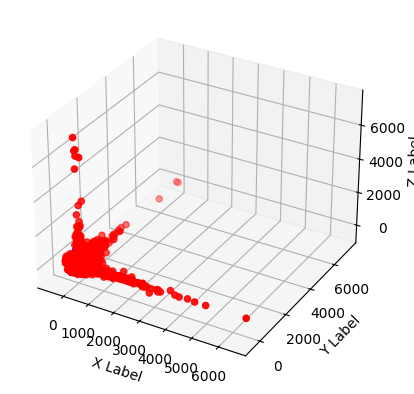

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_isolation_no_outliers.reshape(3,-1)[0],data_pca_isolation_no_outliers.reshape(3,-1)[1],data_pca_isolation_no_outliers.reshape(3,-1)[2], c='b', marker='o')
scatter = ax.scatter(data_pca_isolation_outliers.reshape(3,-1)[0],data_pca_isolation_outliers.reshape(3,-1)[1],data_pca_isolation_outliers.reshape(3,-1)[2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### imbalanced classification task

In [30]:
data_imbalance = {'feature1': [i for i in range(100)],
        'class': [0 for i in range(95)] + [1 for j in range(5)]}

In [31]:
data_imbalance['class']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(np.array(data_imbalance['feature1']).reshape(-1,1), np.array(data_imbalance['class']).reshape(-1,1), test_size=0.2, random_state=42, shuffle=True)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
pred = tree.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### oversampling

In [35]:
data_imbalance['class'].count(0), data_imbalance['class'].count(1)

(95, 5)

In [36]:
data_imbalance_df = pd.DataFrame(data_imbalance)

In [37]:
df_majority = data_imbalance_df[data_imbalance_df['class'] == 0]
df_minority = data_imbalance_df[data_imbalance_df['class'] == 1]

In [38]:
n_samples_to_add = len(df_majority) - len(df_minority)

In [39]:
df_minority_oversampled = df_minority.sample(n=n_samples_to_add, replace=True, random_state=1)

print("Oversampled minority class examples:", len(df_minority_oversampled))

Oversampled minority class examples: 90


In [40]:
df_oversampled = pd.concat([df_majority, df_minority, df_minority_oversampled])

df_oversampled = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_oversampled['class'].value_counts())

class
1    95
0    95
Name: count, dtype: int64


In [41]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(np.array(df_oversampled['feature1']).reshape(-1,1), np.array(df_oversampled['class']).reshape(-1,1), test_size=0.2, random_state=42, shuffle=True)

tree_over = DecisionTreeClassifier()
tree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [42]:
pred_over = tree_over.predict(X_test_over)

In [43]:
accuracy_over = accuracy_score(y_test_over, pred_over)
print("Accuracy:", accuracy_over)

Accuracy: 1.0


### undersampling

In [44]:
n_samples_to_retain = len(df_minority)

In [45]:
df_majority_undersampled = df_majority.sample(n=n_samples_to_retain, random_state=1)

In [46]:
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

In [47]:
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [48]:
df_undersampled['class'].value_counts()

class
1    5
0    5
Name: count, dtype: int64

In [49]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(np.array(df_undersampled['feature1']).reshape(-1,1), np.array(df_undersampled['class']).reshape(-1,1), test_size=0.2, random_state=42, shuffle=True)

tree_under = DecisionTreeClassifier()
tree_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier()

In [50]:
pred_under = tree_under.predict(X_test_under)

accuracy_under = accuracy_score(y_test_under, pred_under)
print("Accuracy:", accuracy_under)

Accuracy: 1.0
